In [1]:
import sys

PWD = '../..'
sys.path.append(PWD)

import matplotlib.pyplot as plt
import numpy as np

from collections import defaultdict

import os

# Maximum per channel for all the files

In [4]:
file_dir = PWD + '/data/extracted'
file_names = [
    'Ntuple_runsampic_159_runtelescope_636.npz',
    'Ntuple_runsampic_160_runtelescope_637.npz',
    'Ntuple_runsampic_161_runtelescope_638.npz',
    'Ntuple_runsampic_163_runtelescope_640.npz',
    'Ntuple_runsampic_164_runtelescope_641.npz',
    'Ntuple_runsampic_165_runtelescope_642.npz',
    'Ntuple_runsampic_166_runtelescope_643.npz',
    'Ntuple_runsampic_168_runtelescope_646.npz',
    'Ntuple_runsampic_169_runtelescope_648.npz',
    'Ntuple_runsampic_171_runtelescope_650.npz',
    'Ntuple_runsampic_172_runtelescope_651.npz'
]

In [5]:
file_channel_events = []
for file_name in file_names:
    print(f'Loading {file_name} ...')
    file_channel_events.append(np.load(file_dir + '/' + file_name, allow_pickle=True)['arr_0'].flat[0])

channels = sorted(file_channel_events[0].keys())

Loading Ntuple_runsampic_159_runtelescope_636.npz ...
Loading Ntuple_runsampic_160_runtelescope_637.npz ...
Loading Ntuple_runsampic_161_runtelescope_638.npz ...
Loading Ntuple_runsampic_163_runtelescope_640.npz ...
Loading Ntuple_runsampic_164_runtelescope_641.npz ...
Loading Ntuple_runsampic_165_runtelescope_642.npz ...
Loading Ntuple_runsampic_166_runtelescope_643.npz ...
Loading Ntuple_runsampic_168_runtelescope_646.npz ...
Loading Ntuple_runsampic_169_runtelescope_648.npz ...
Loading Ntuple_runsampic_171_runtelescope_650.npz ...
Loading Ntuple_runsampic_172_runtelescope_651.npz ...


In [9]:
def plot_max_channel_hist(X, n_bins=100, title='', add_count=False, ylim=None, thresholds=None):
    X = np.max(X, axis=1)
    counts, bins, _ = plt.hist(X, bins=n_bins, range=(0, 1))
    if add_count:
        title += f' ({len(X)} events)'
    plt.title(title)
    plt.xlim(-0.05, 1.05)
    if ylim is not None:
        if ylim == 'auto':
            plt.ylim(0, np.sort(counts)[-5])
        else:
            plt.ylim(0, ylim)
    if thresholds:
        plt.axvline(thresholds[0], color='red')
        plt.axvline(thresholds[1], color='red')
        
def filter_channel_events(channel_events, th_ch_min, th_ch_max, th_0_min=0.2, th_0_max=0.95):
    filtered_channel_events = {}
    filtered_channel_events_saturated = {}
        
    ampl_data = np.array(channel_events['sample_ampl'])
    max_ampl = np.array(ampl_data.max(axis=2))

    ch_0_mask = np.logical_and(max_ampl[:, 0] >= th_0_min, max_ampl[:, 0] <= th_0_max)
    ch_ch_mask = np.logical_and(max_ampl[:, 1] >= th_ch_min, max_ampl[:, 1] <= th_ch_max)
    
    ch_ch_mask_saturated = max_ampl[:, 1] > th_ch_max
    
    mask = np.logical_and(ch_0_mask, ch_ch_mask)
    mask_saturated=np.logical_and(ch_0_mask, ch_ch_mask_saturated)

    for key, arr in channel_events.items():
        filtered_channel_events[key] = np.array(arr)[mask]
        filtered_channel_events_saturated[key]=np.array(arr)[mask_saturated]
        
    return filtered_channel_events, filtered_channel_events_saturated

In [7]:
channel_thresholds = {
    8: (0.82, 0.98),
    9: (0.65, 0.92),
    10: (0.68, 0.95),
    11: (0.82, 0.98),
    12: None,
    13: (0.18, 0.55),
    14: (0.22, 0.6),
    15: None,
    16: (0.8, 0.99),
    17: (0.6, 0.98),
    18: (0.78, 0.98),
    19: (0.35, 0.9),
    20: (0.78, 0.98),
    21: (0.6, 0.95),
    22: (0.84, 0.99),
    23: (0.85, 0.99),
    24: (0.3, 0.82),
    25: (0.25, 0.76),
    26: (0.25, 0.55),
    27: (0.34, 0.68),
    28: (0.62, 0.99),
    29: (0.75, 0.99),
    30: (0.64, 0.98),
    31: (0.6, 0.95),
}

Coincidences - Channel 8
Channel 0


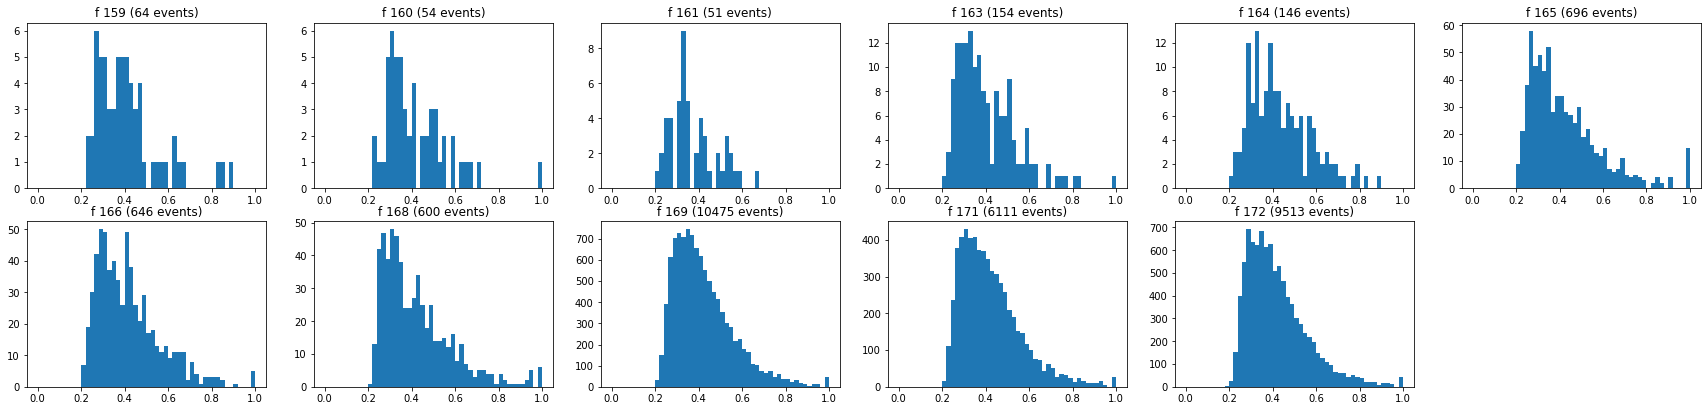

Channel 8


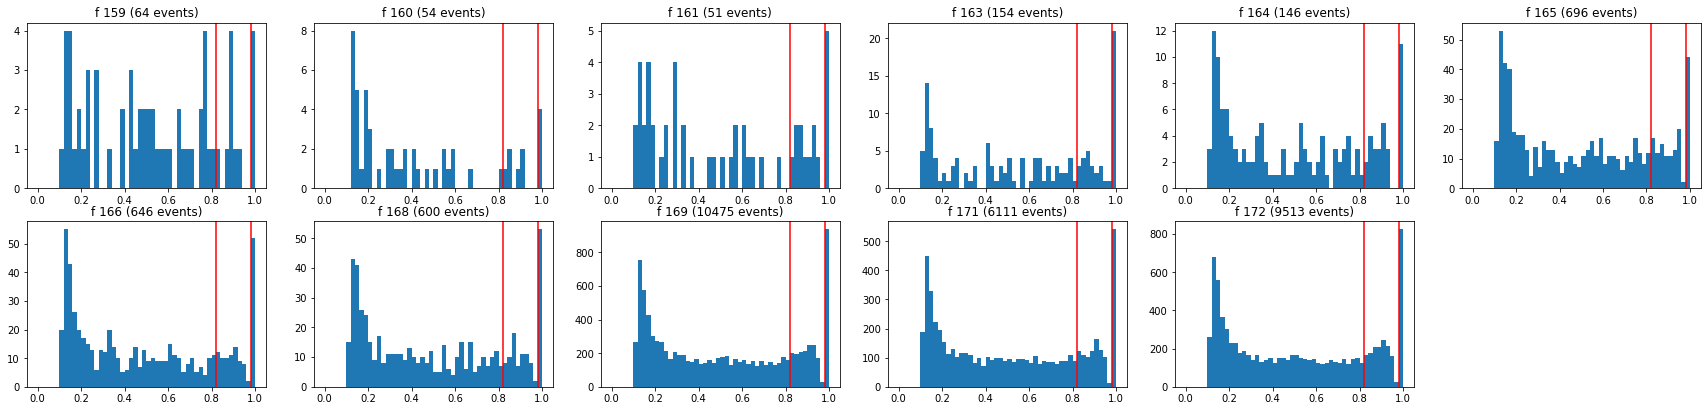

Coincidences - Channel 9
Channel 0


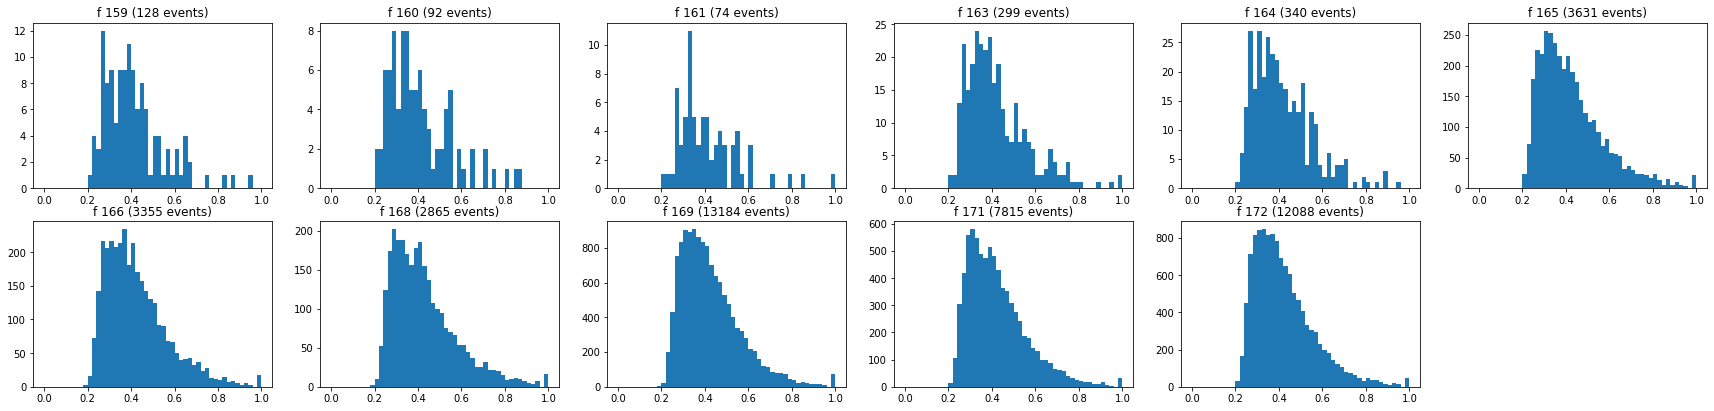

Channel 9


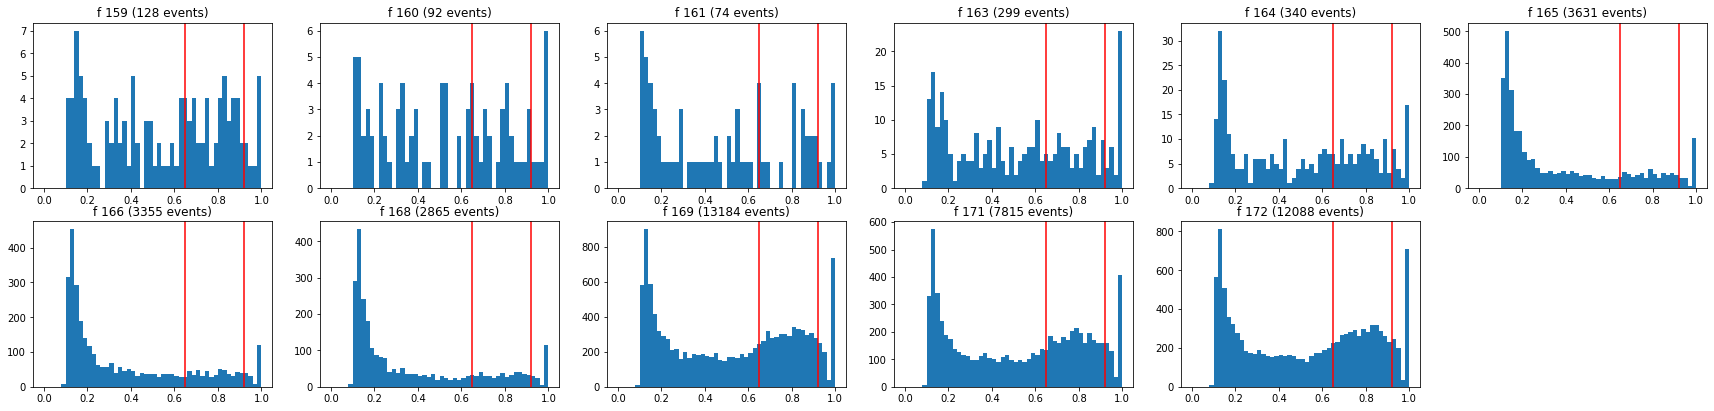

Coincidences - Channel 10
Channel 0


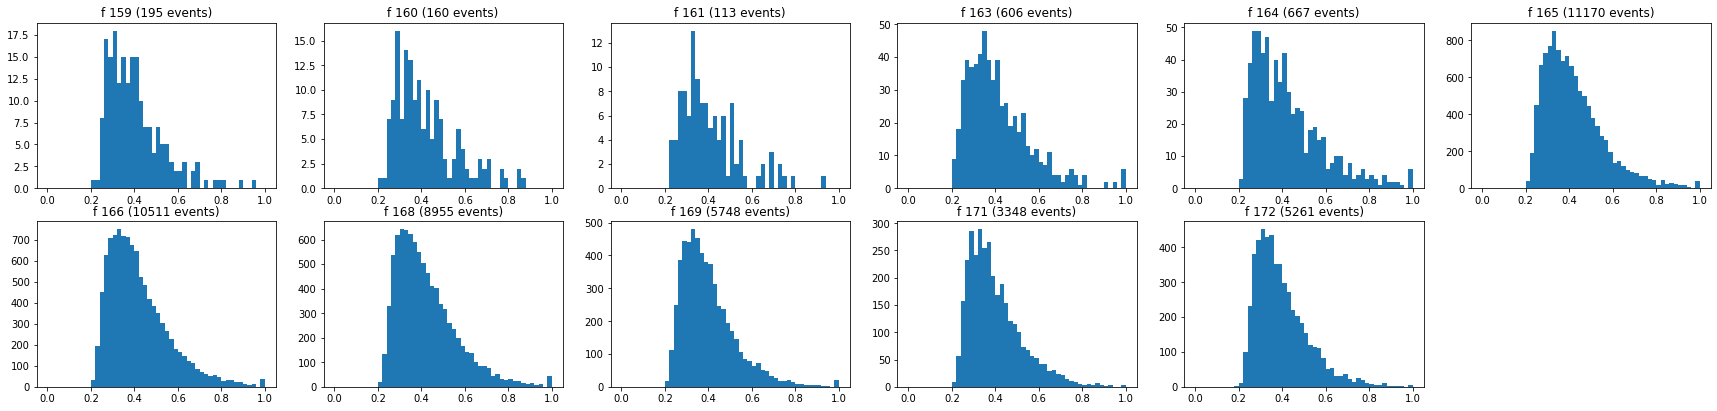

Channel 10


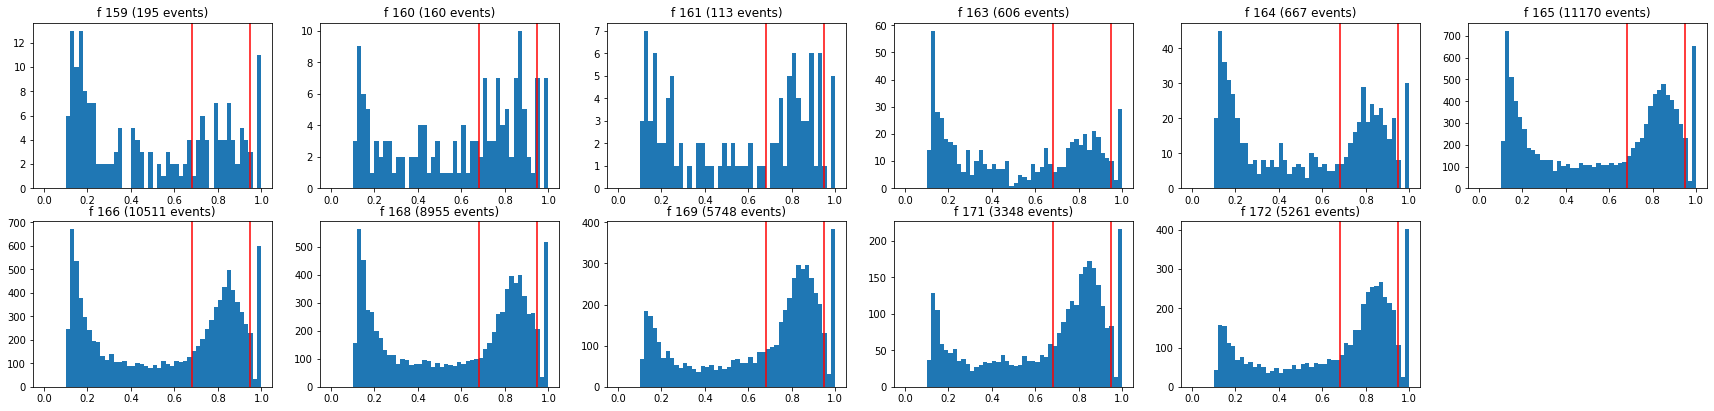

Coincidences - Channel 11
Channel 0


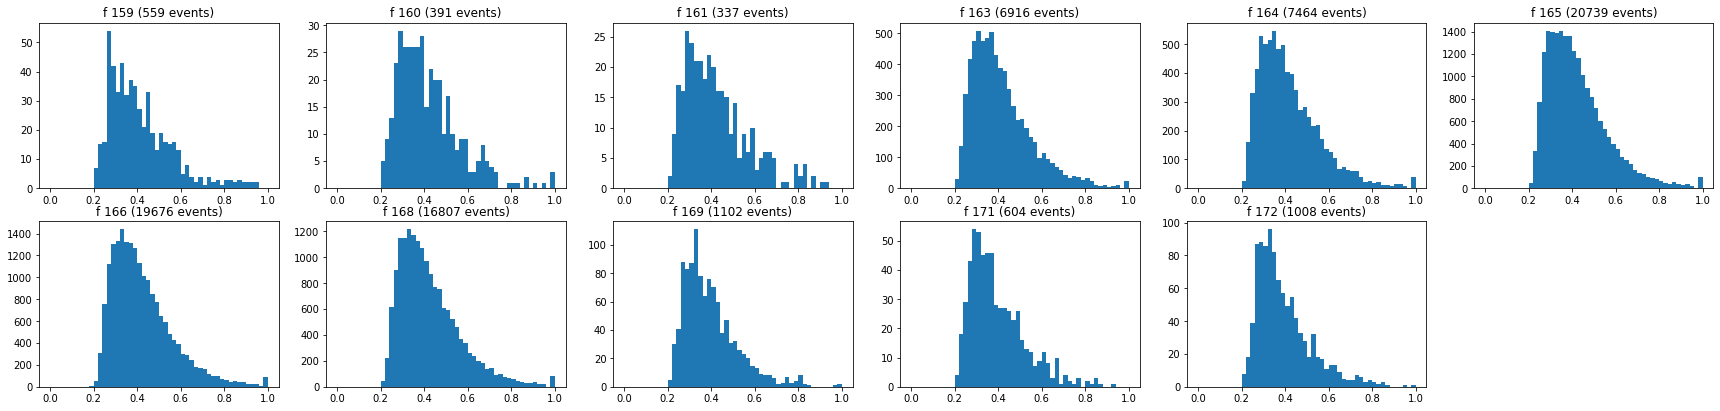

Channel 11


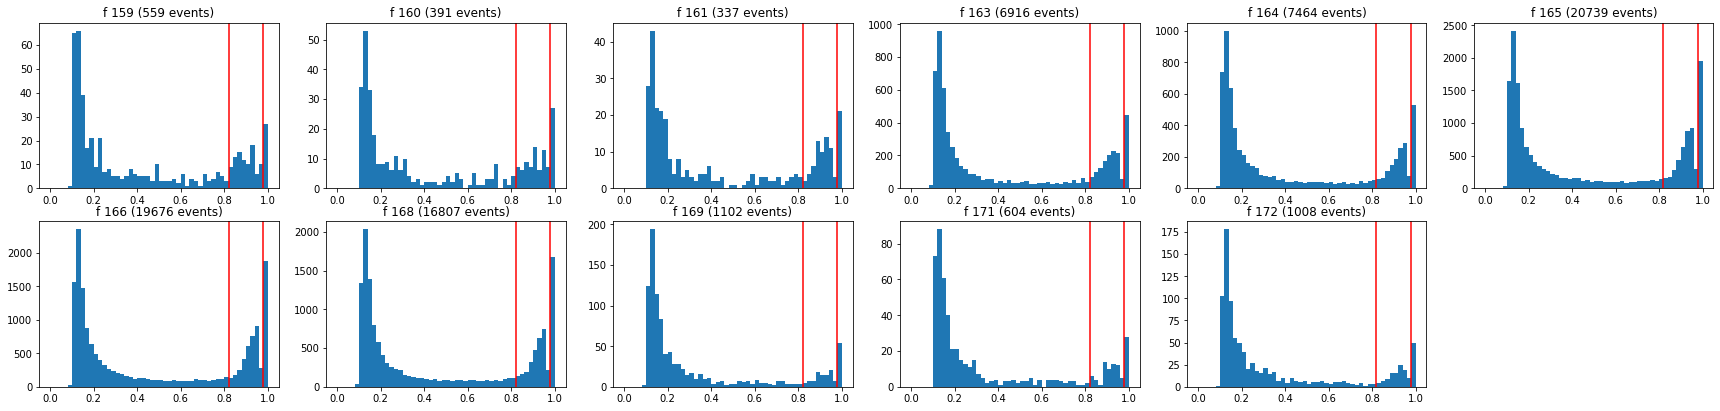

Coincidences - Channel 13
Channel 0


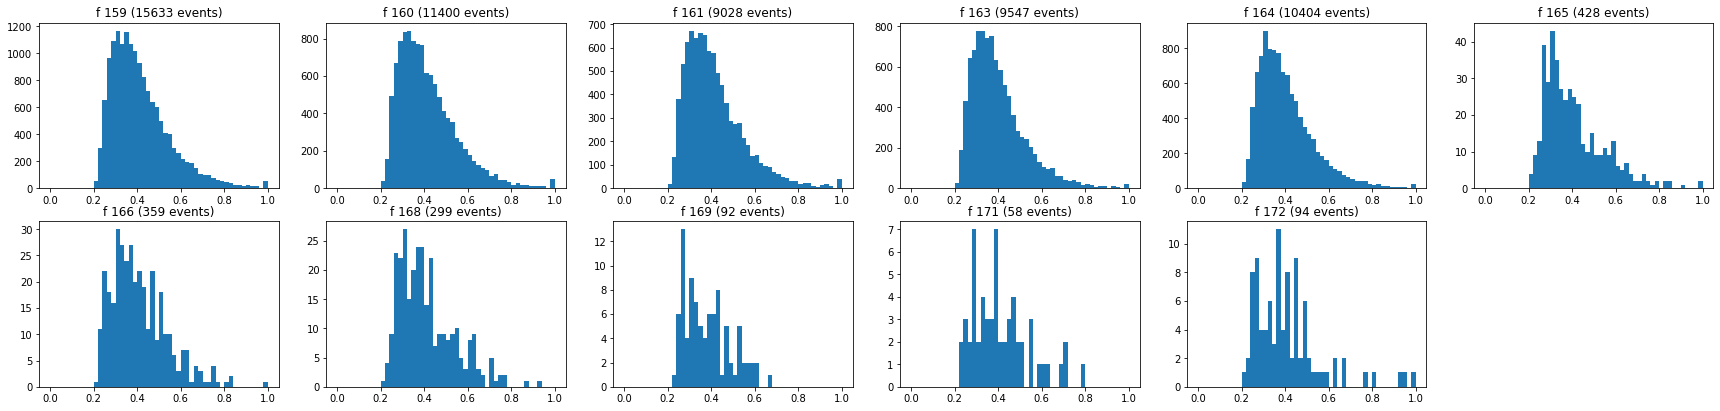

Channel 13


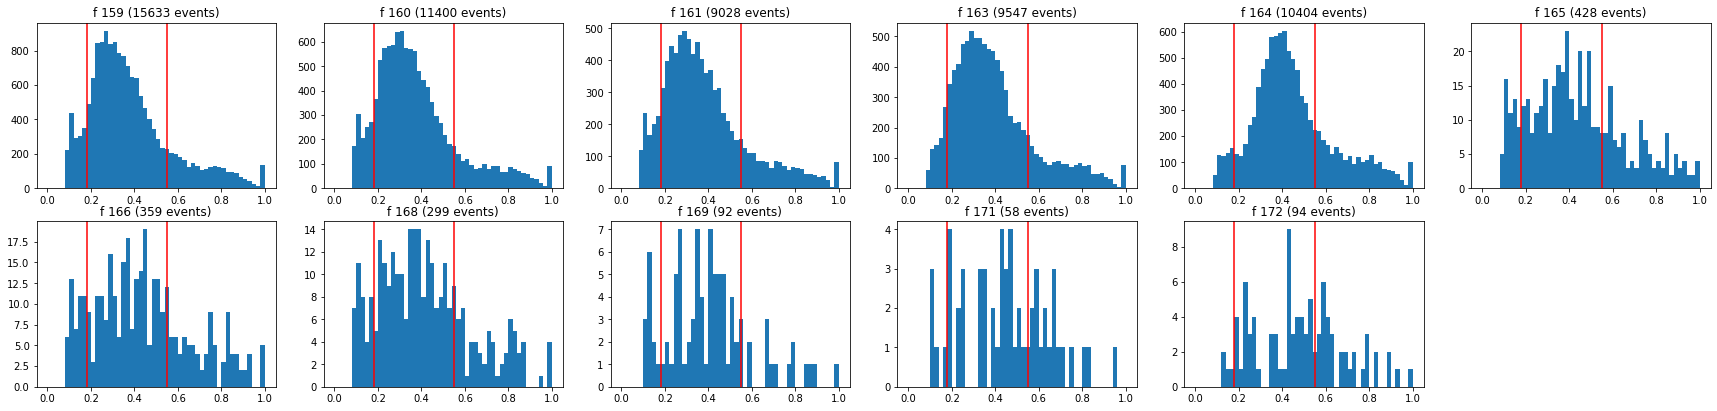

Coincidences - Channel 14
Channel 0


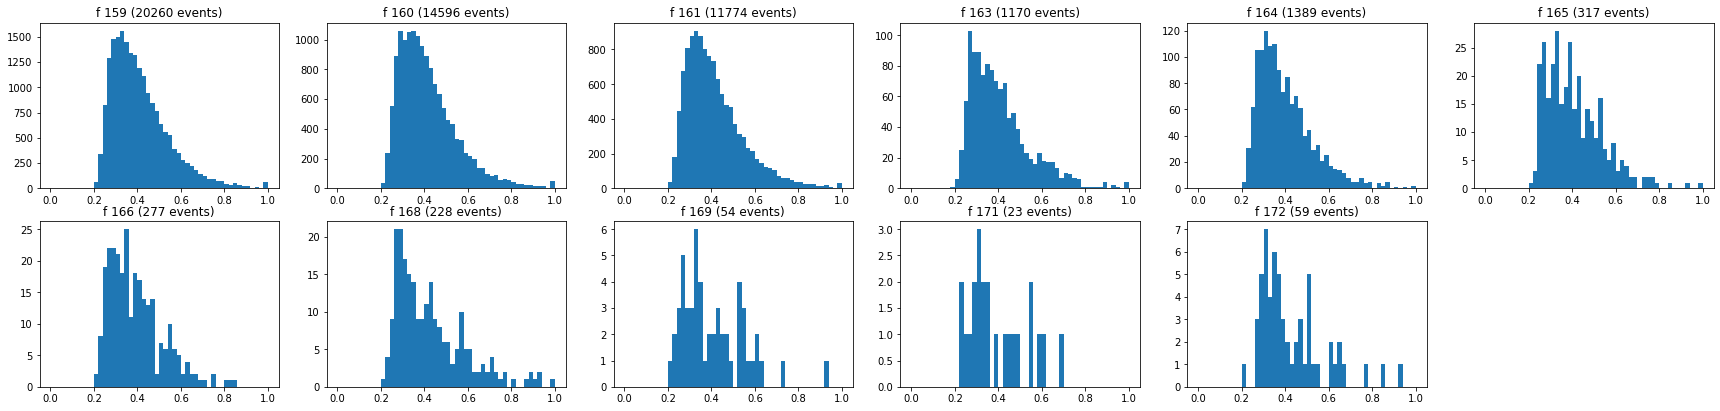

Channel 14


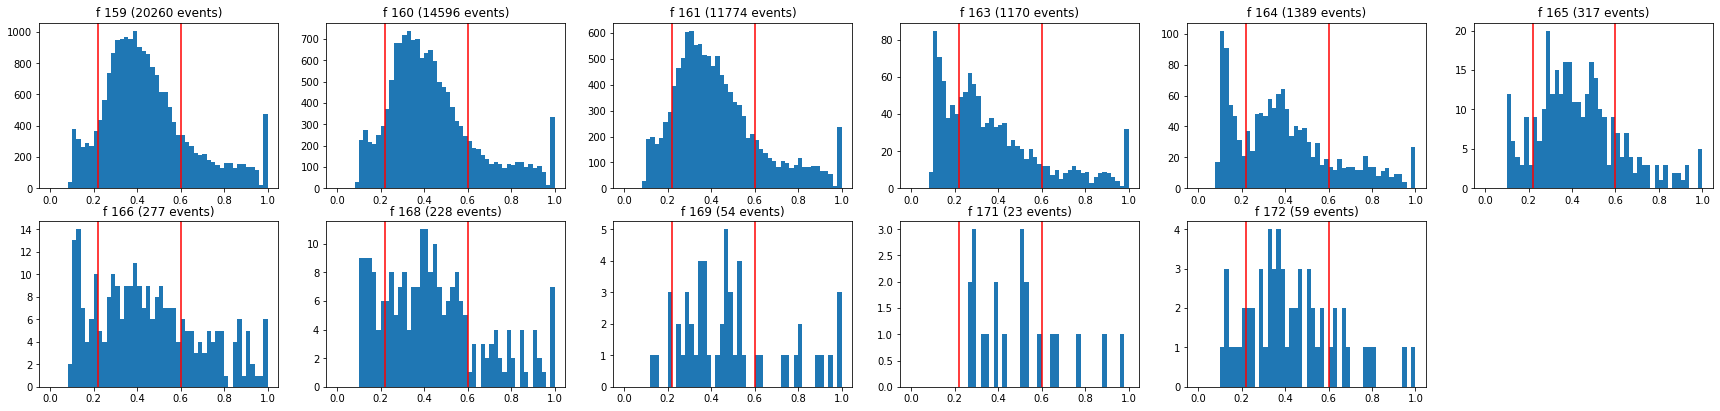

Coincidences - Channel 16
Channel 0


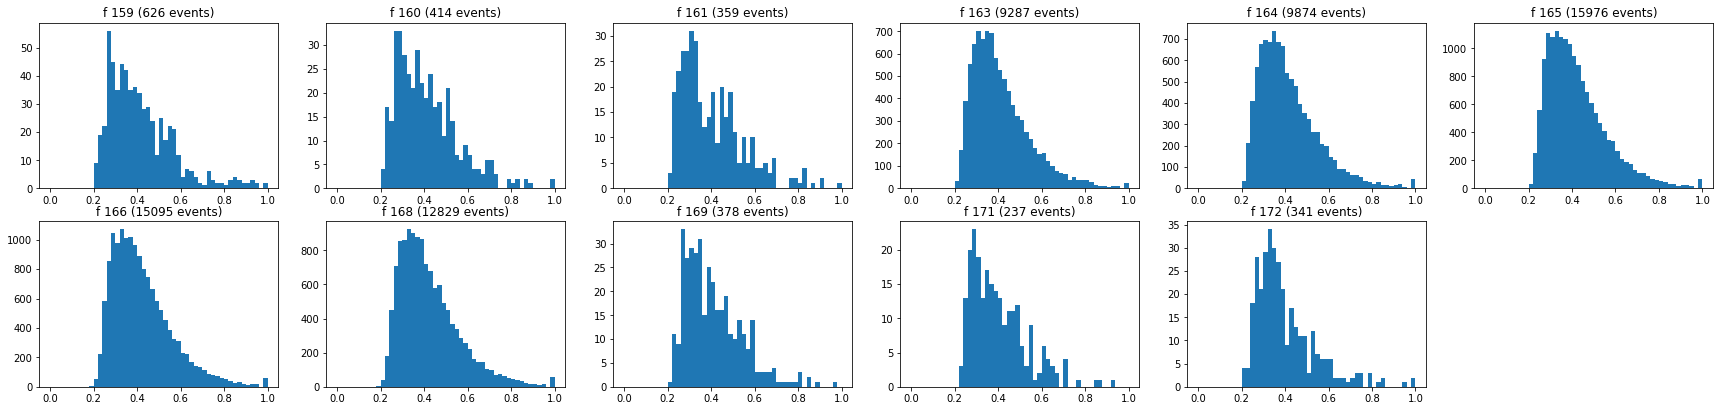

Channel 16


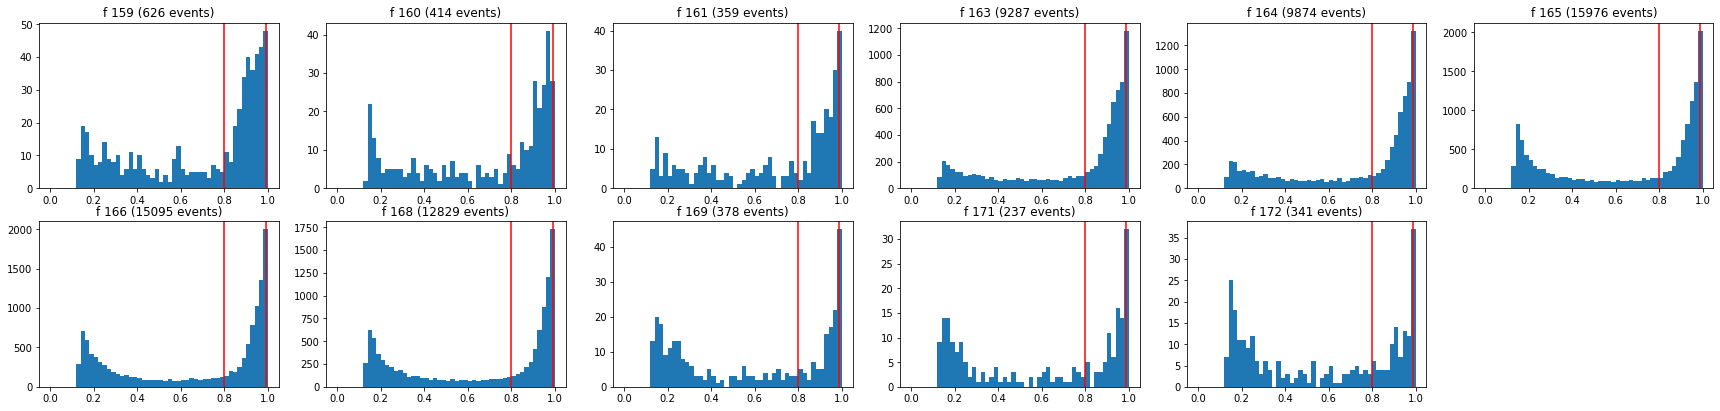

Coincidences - Channel 17
Channel 0


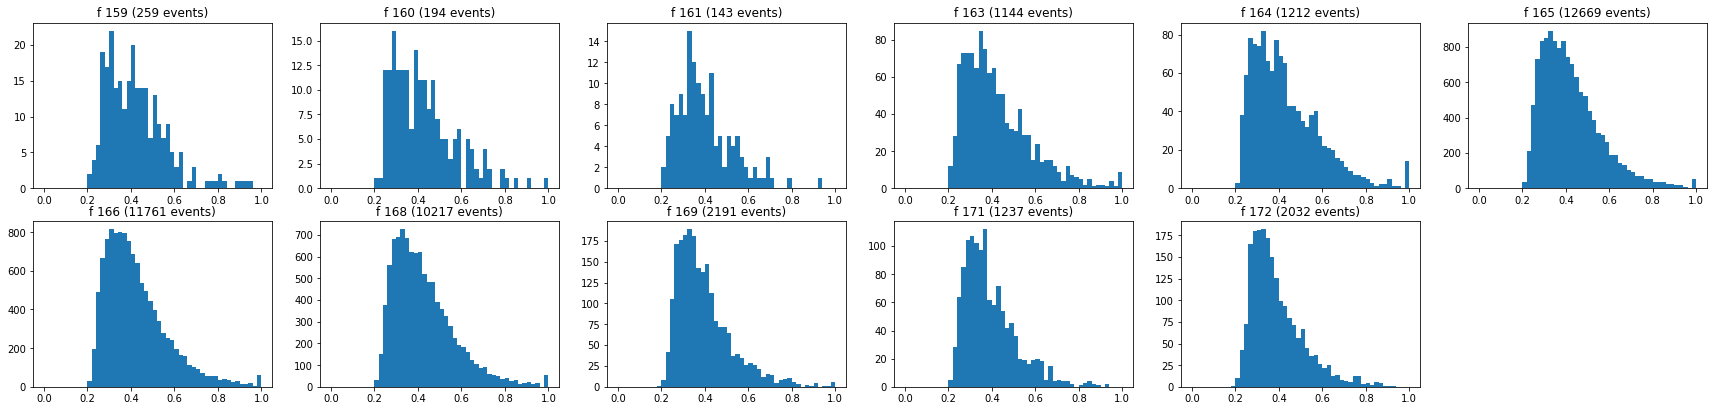

Channel 17


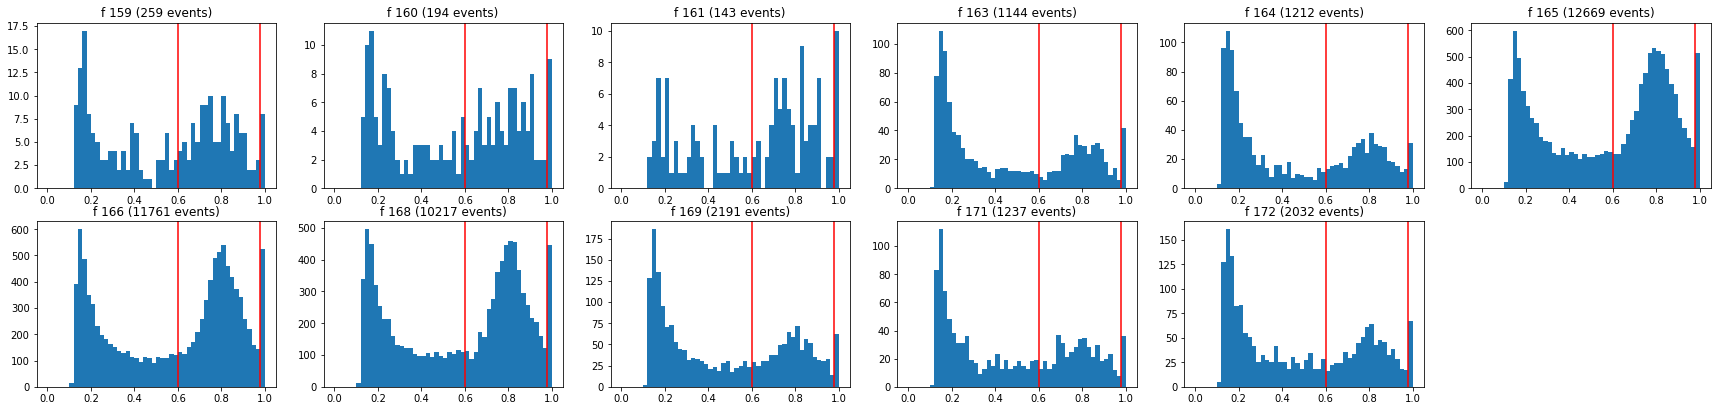

Coincidences - Channel 18
Channel 0


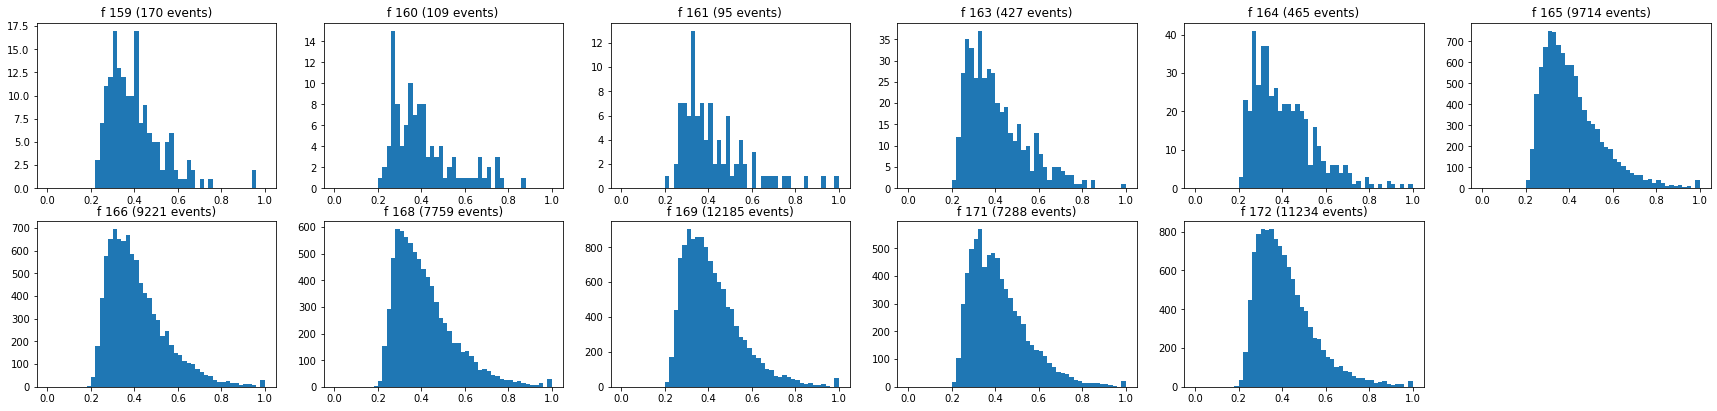

Channel 18


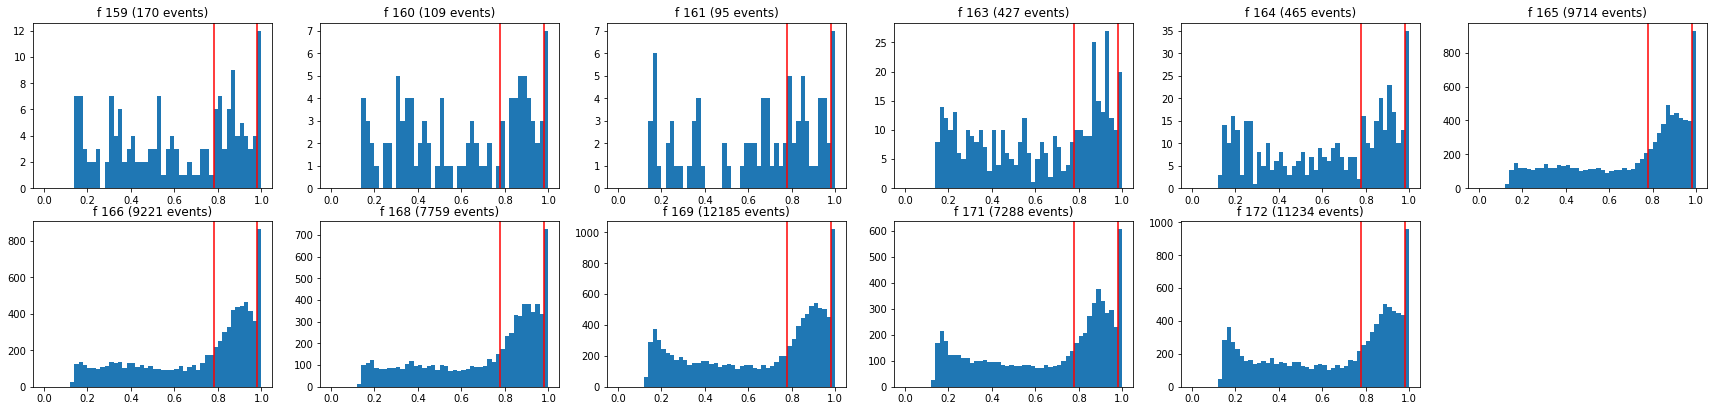

Coincidences - Channel 19
Channel 0


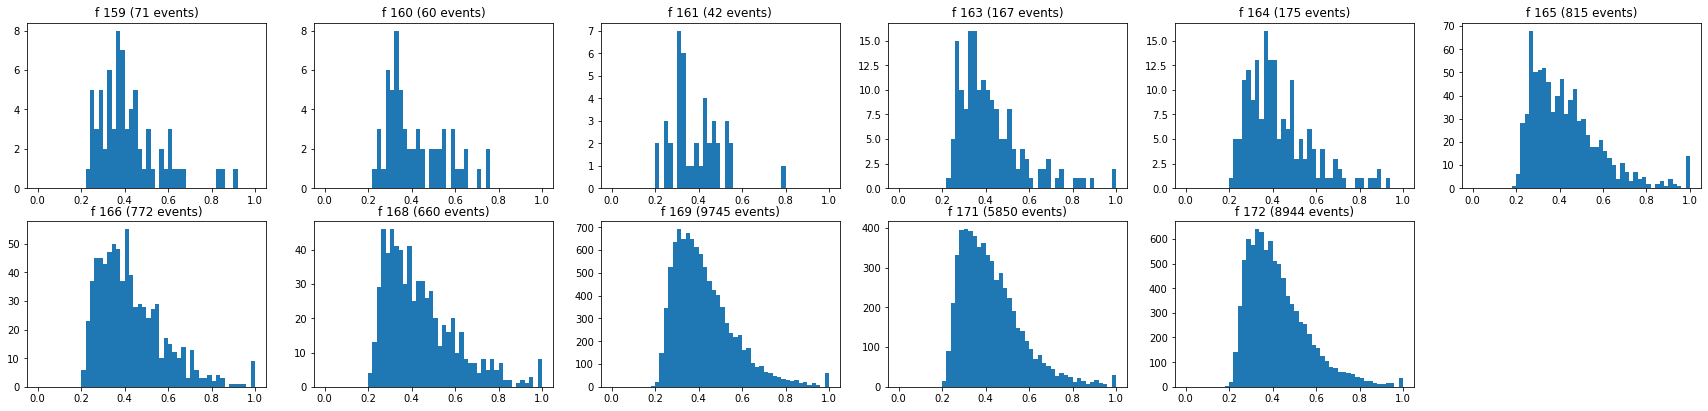

Channel 19


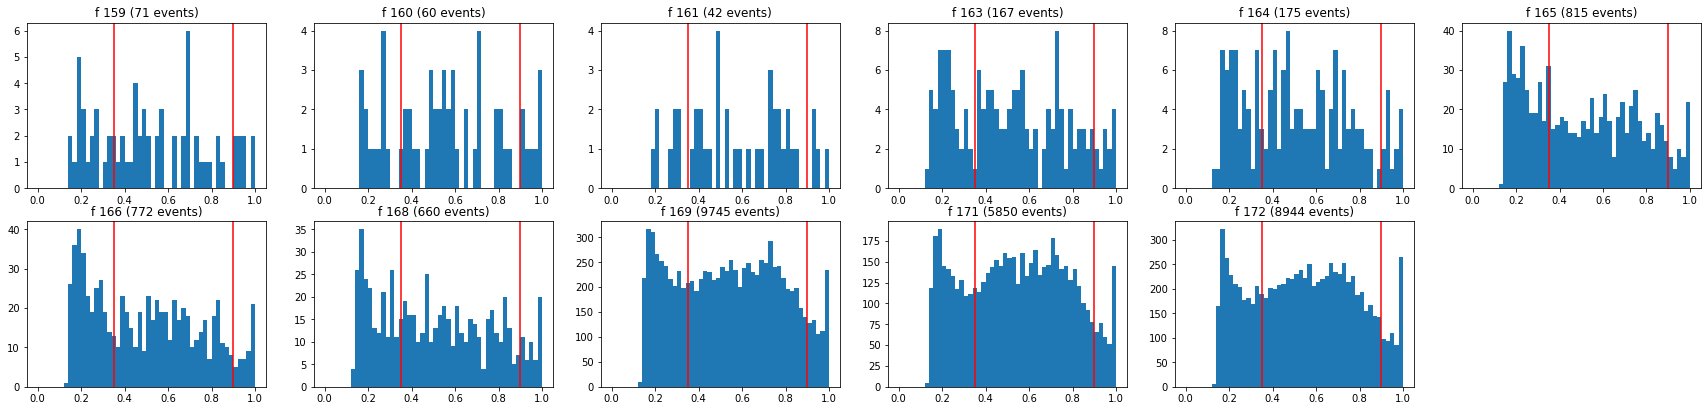

Coincidences - Channel 20
Channel 0


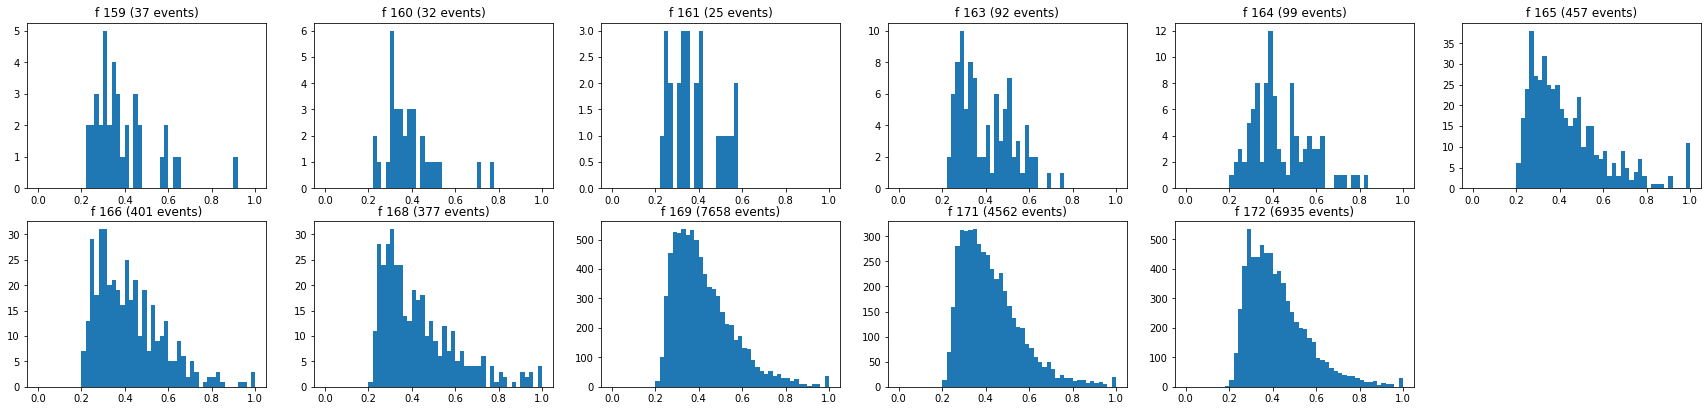

Channel 20


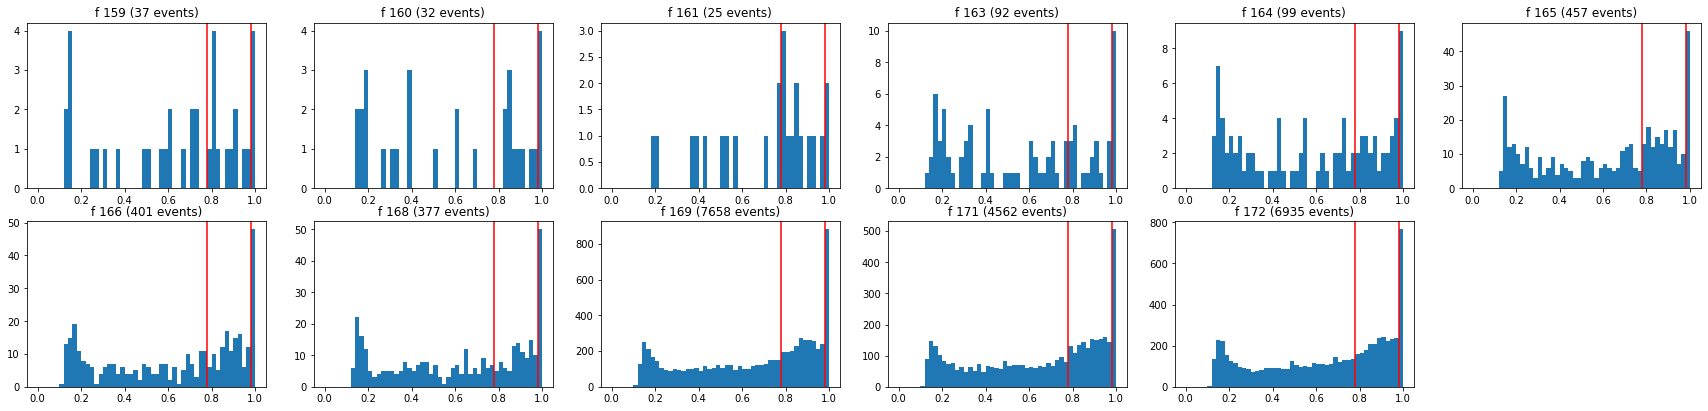

Coincidences - Channel 21
Channel 0


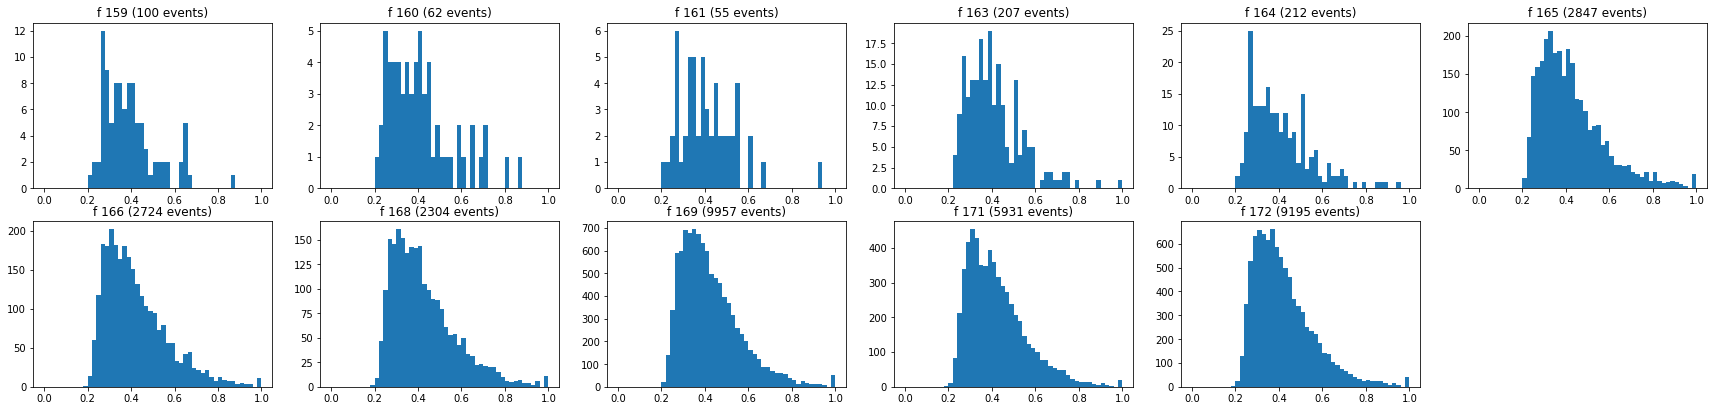

Channel 21


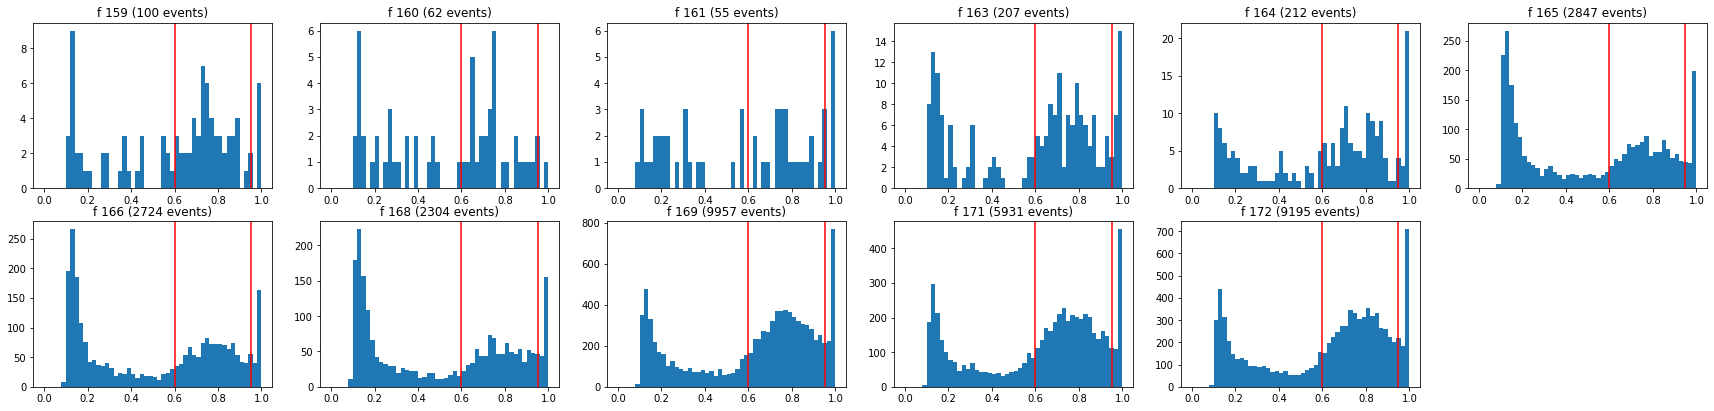

Coincidences - Channel 22
Channel 0


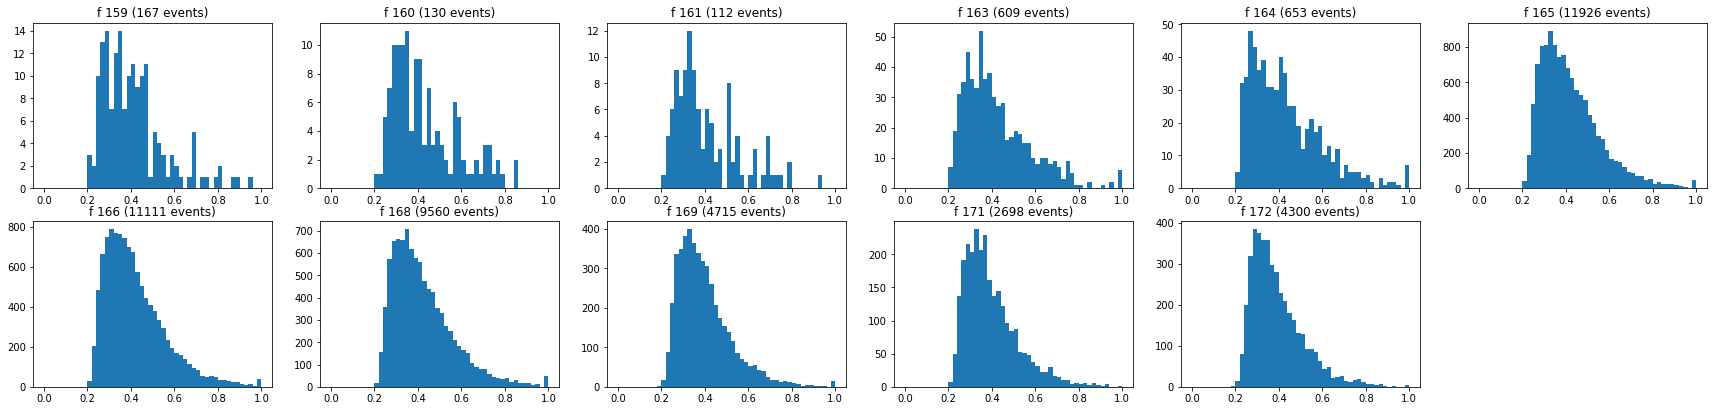

Channel 22


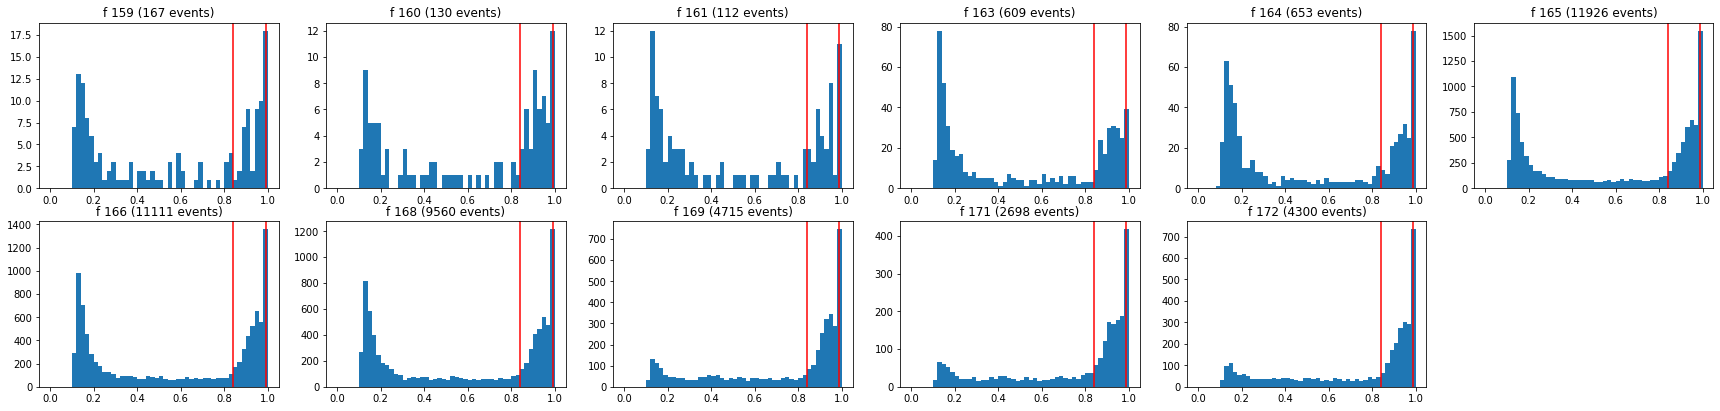

Coincidences - Channel 23
Channel 0


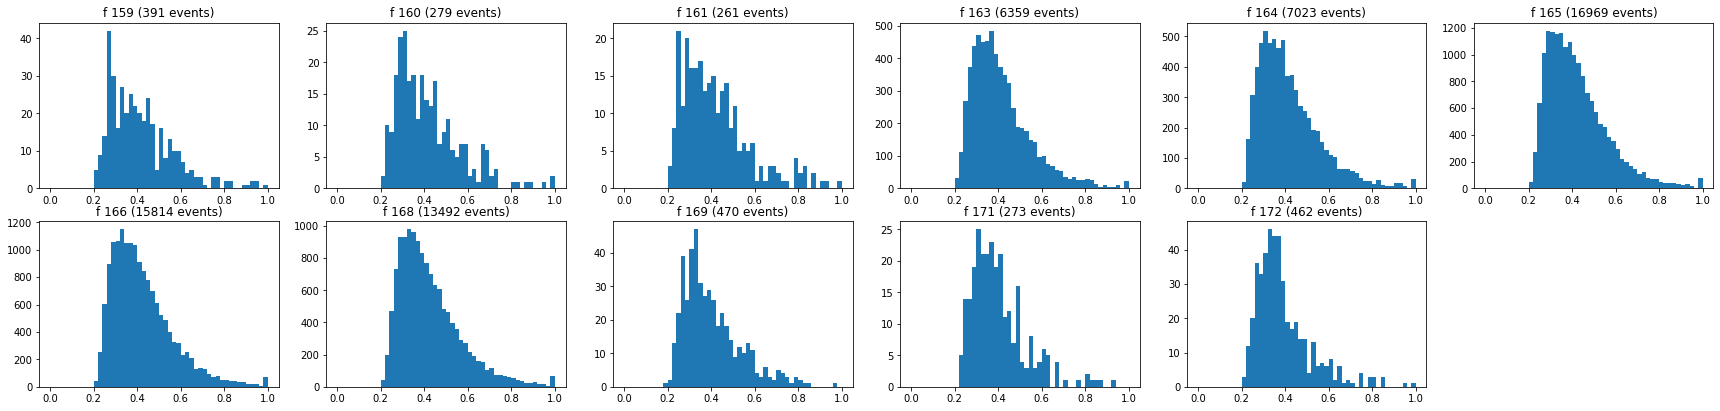

Channel 23


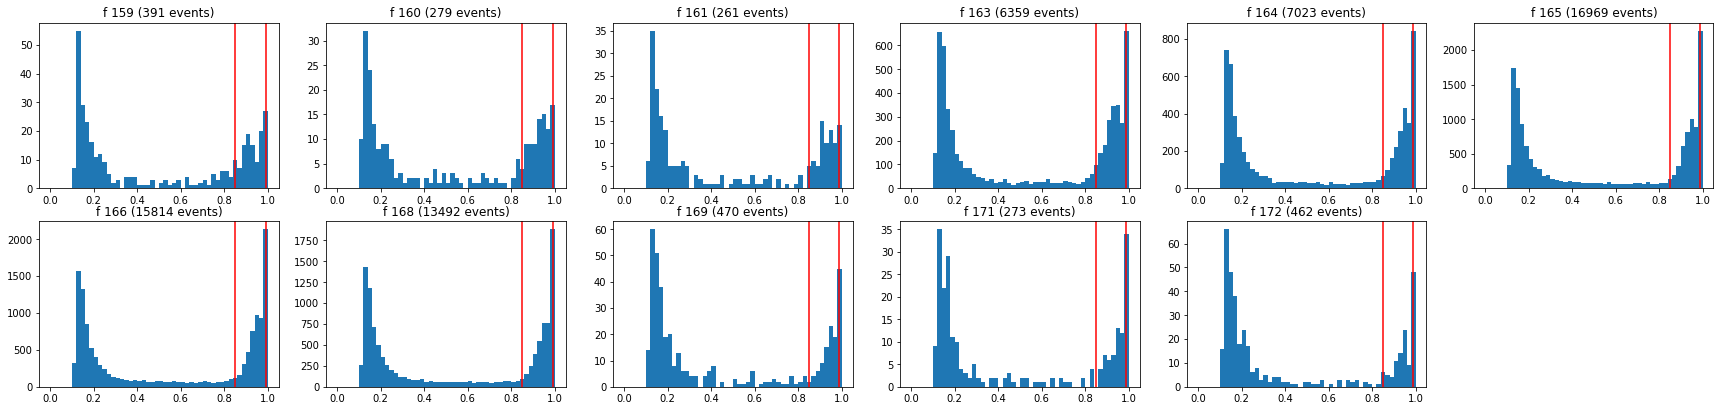

Coincidences - Channel 24
Channel 0


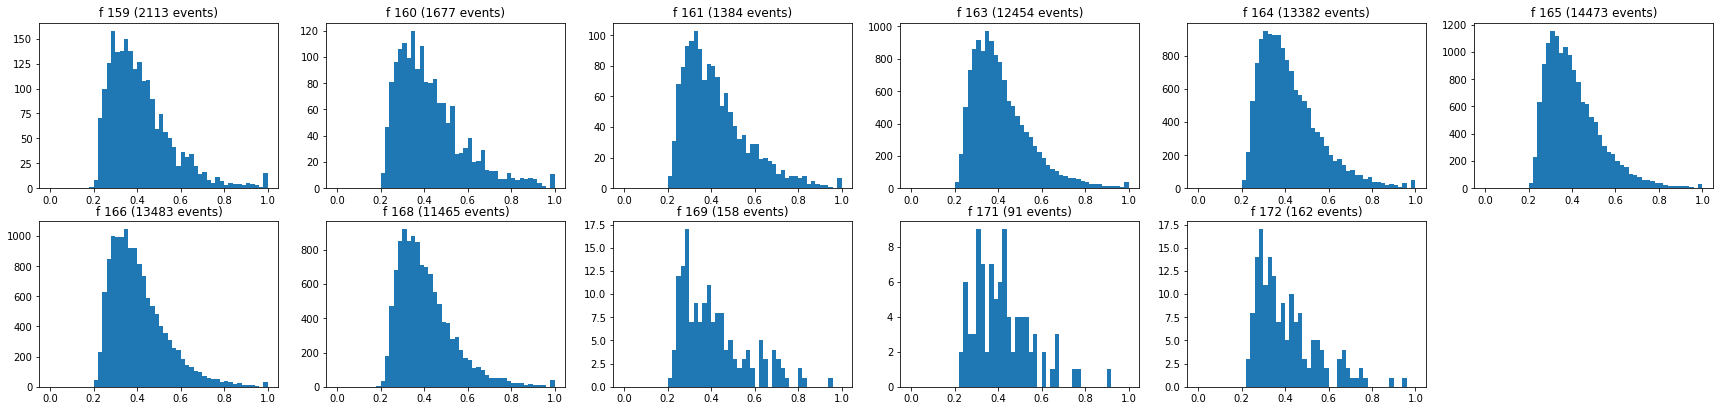

Channel 24


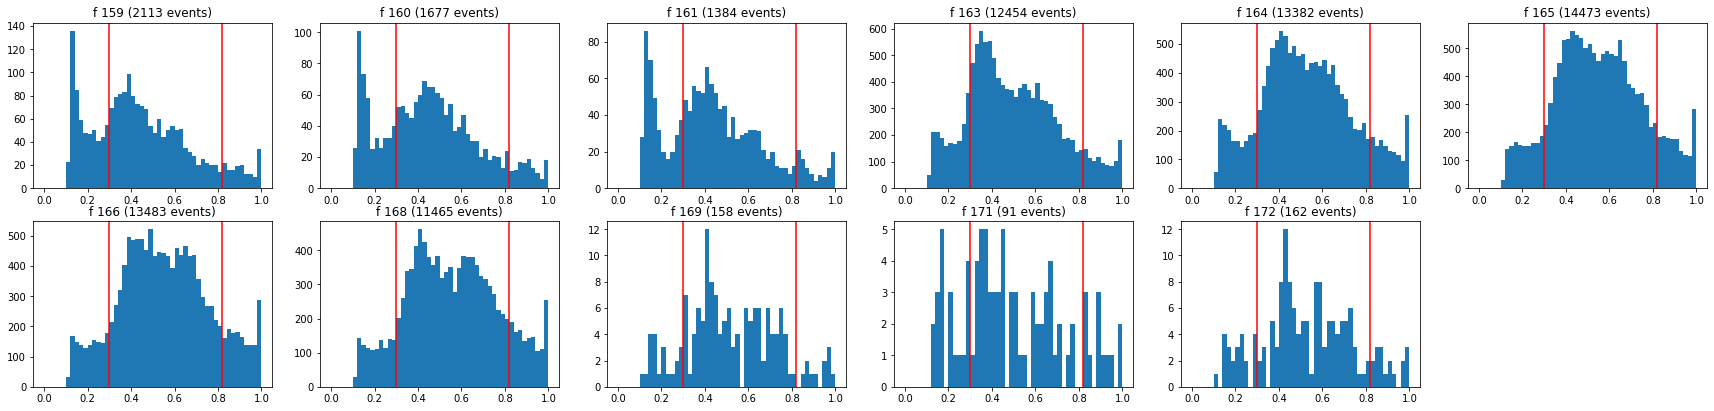

Coincidences - Channel 25
Channel 0


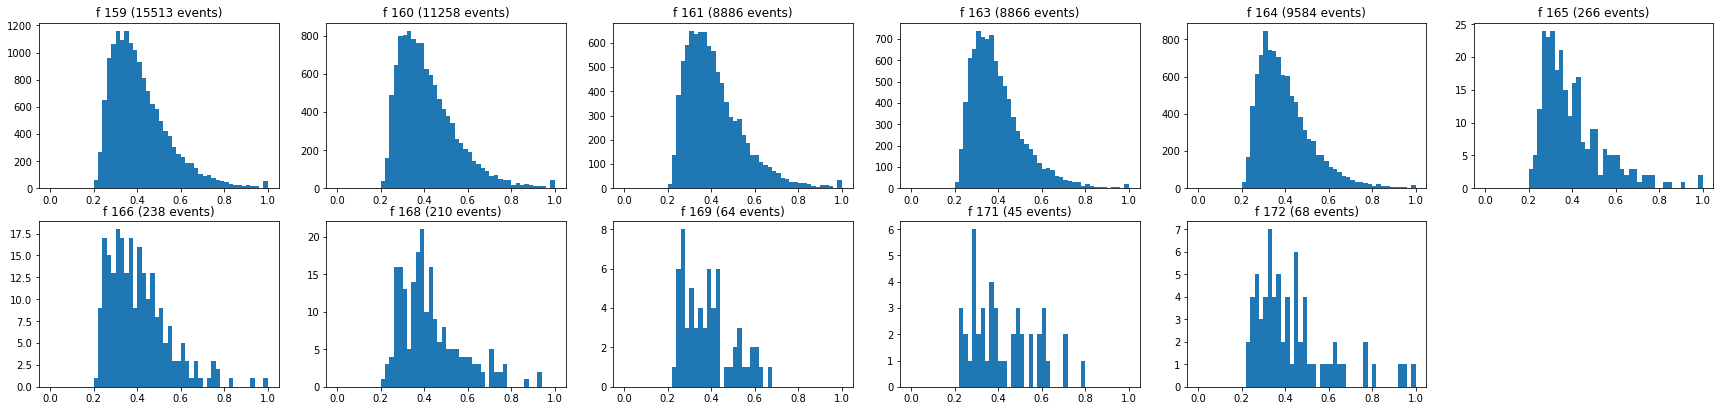

Channel 25


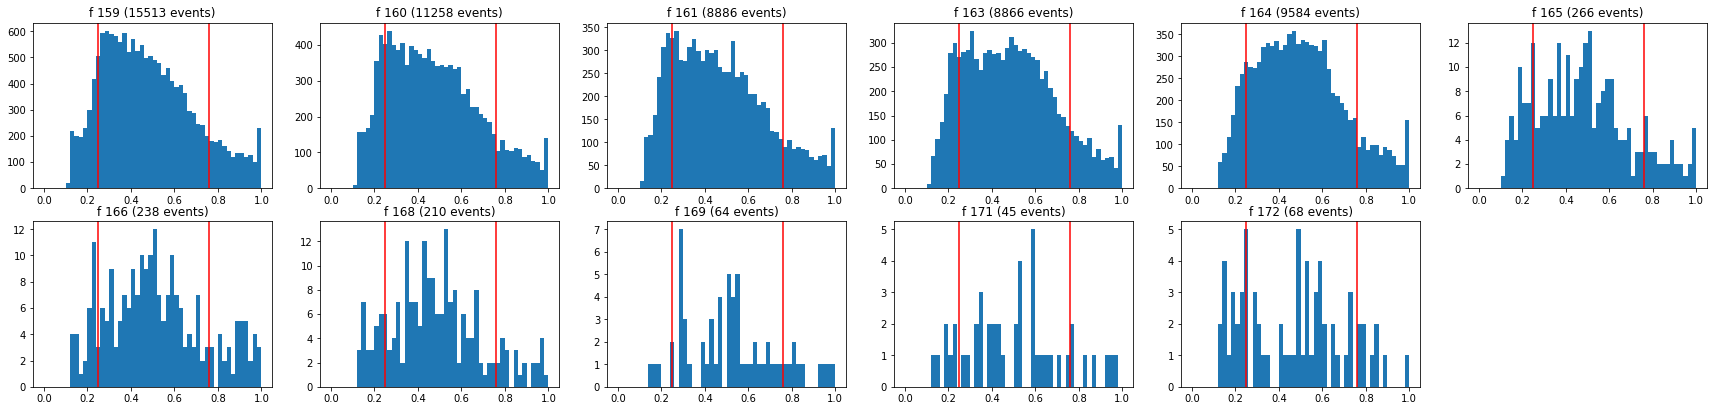

Coincidences - Channel 26
Channel 0


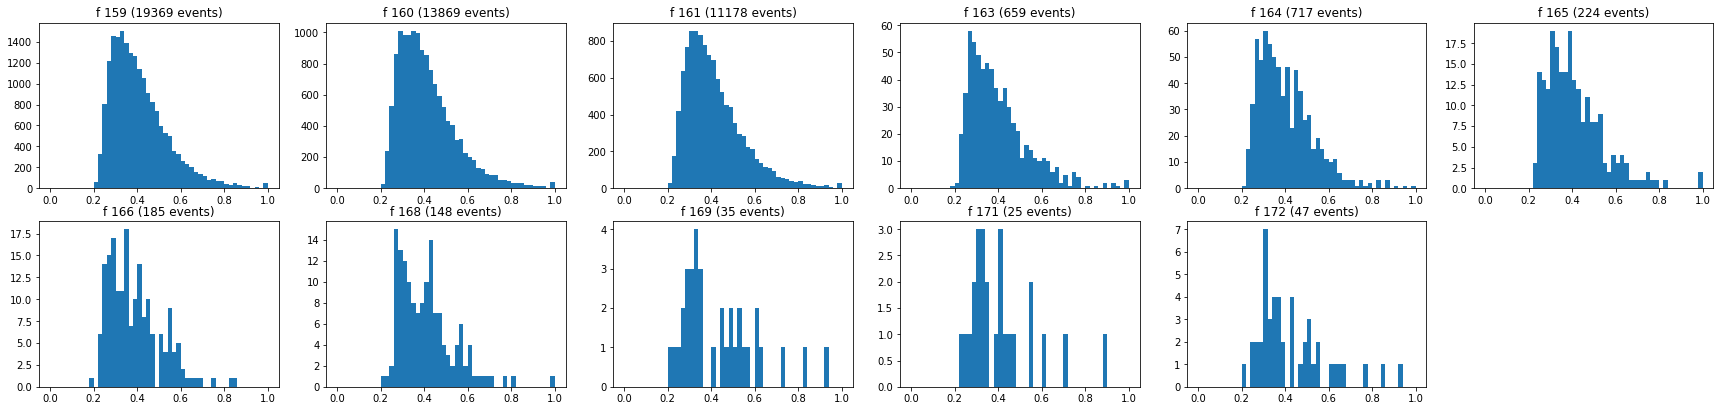

Channel 26


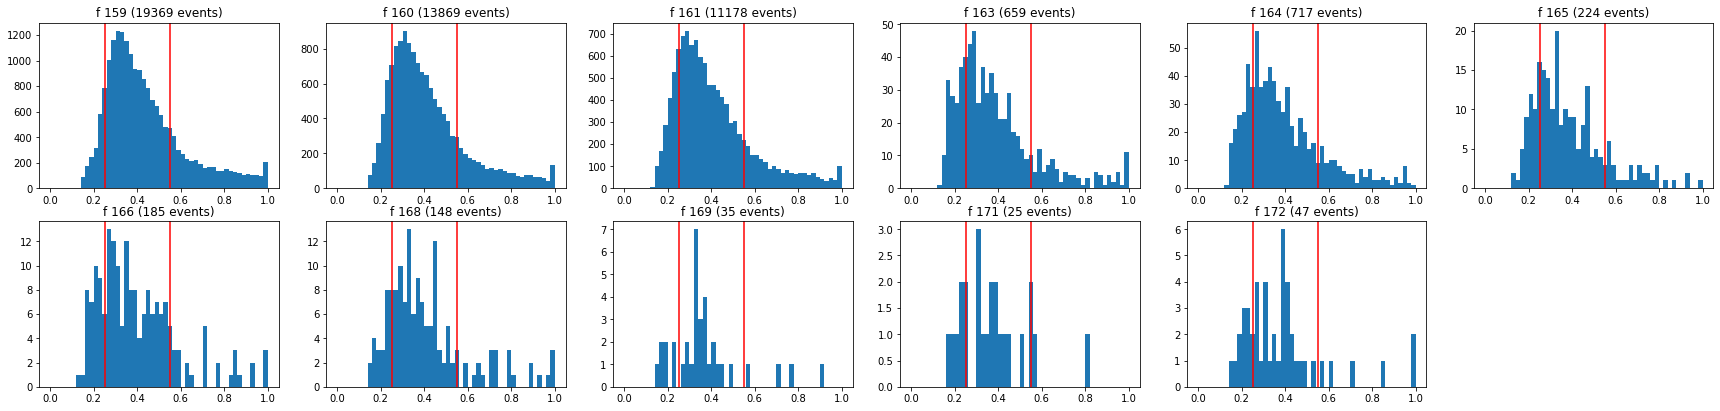

Coincidences - Channel 27
Channel 0


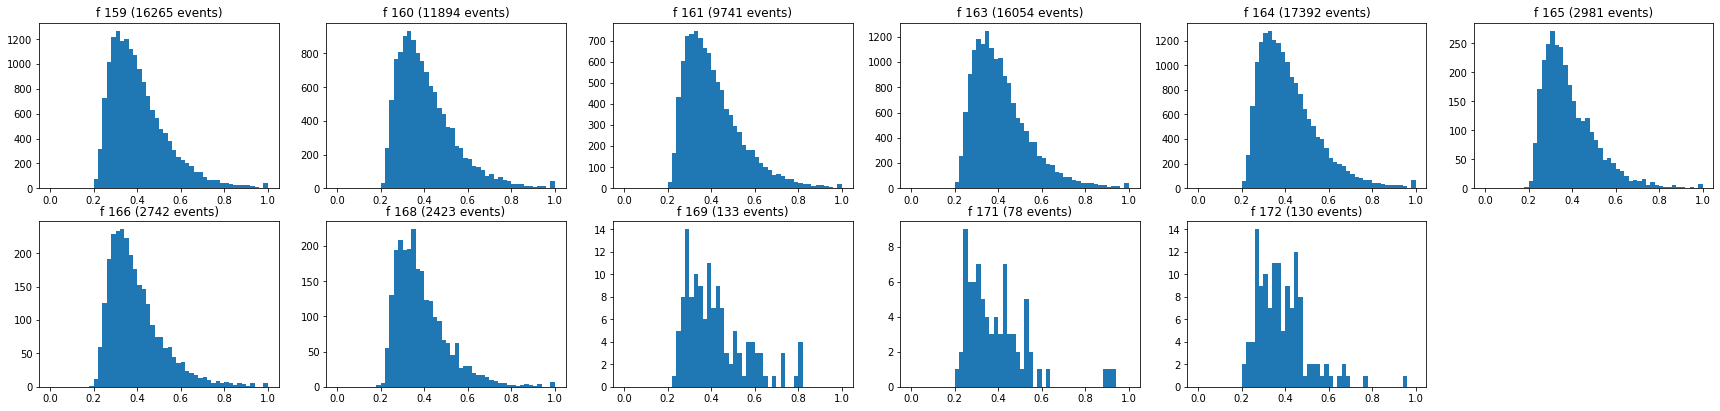

Channel 27


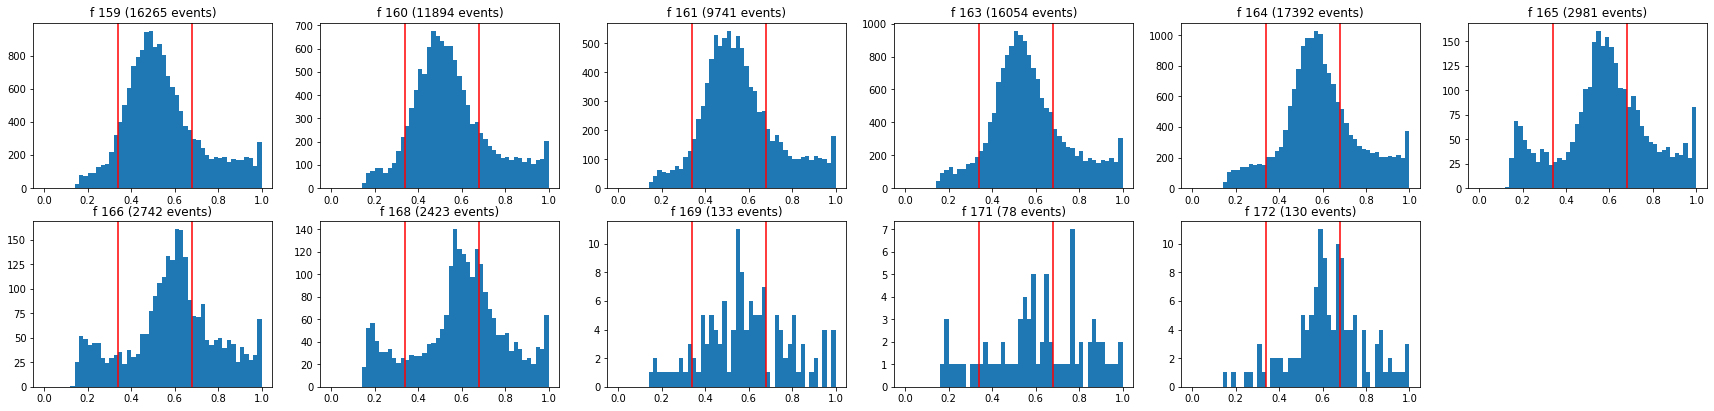

Coincidences - Channel 28
Channel 0


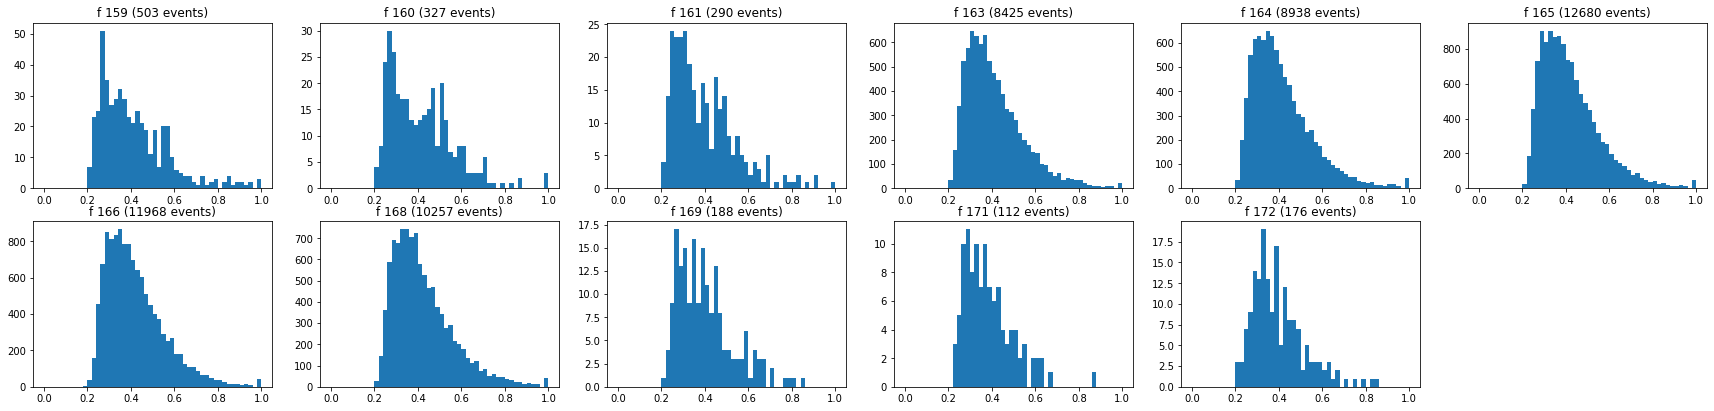

Channel 28


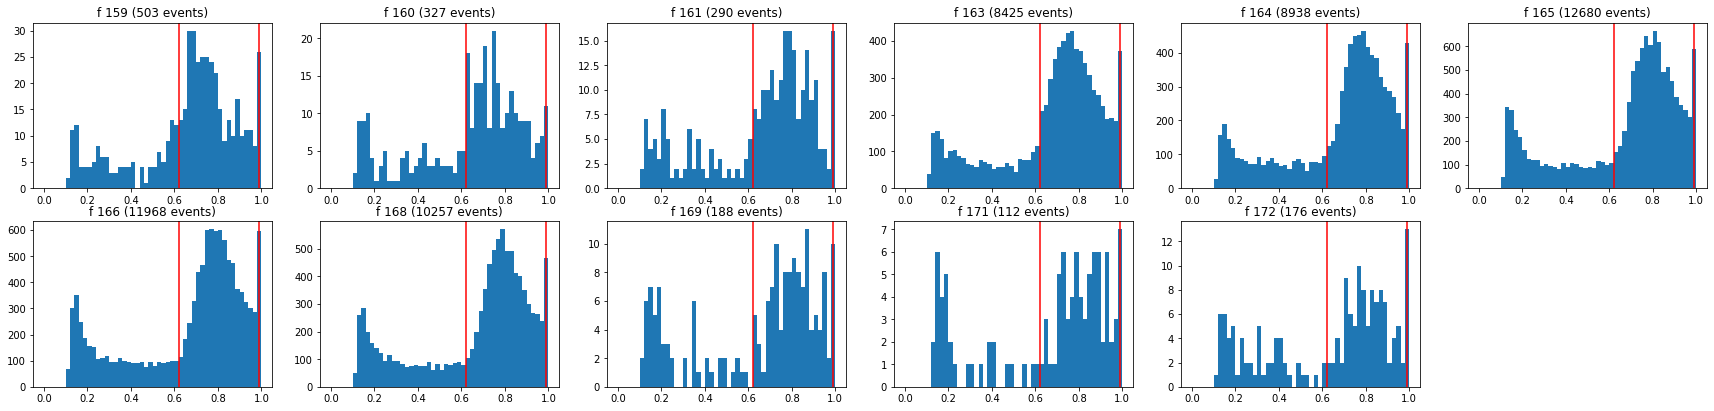

Coincidences - Channel 29
Channel 0


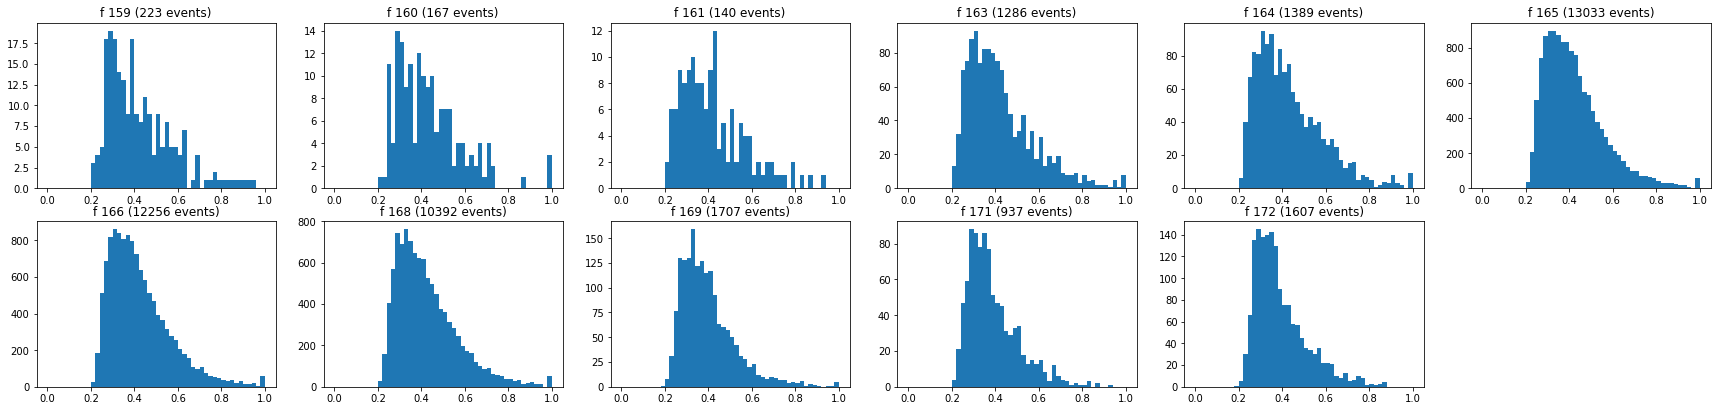

Channel 29


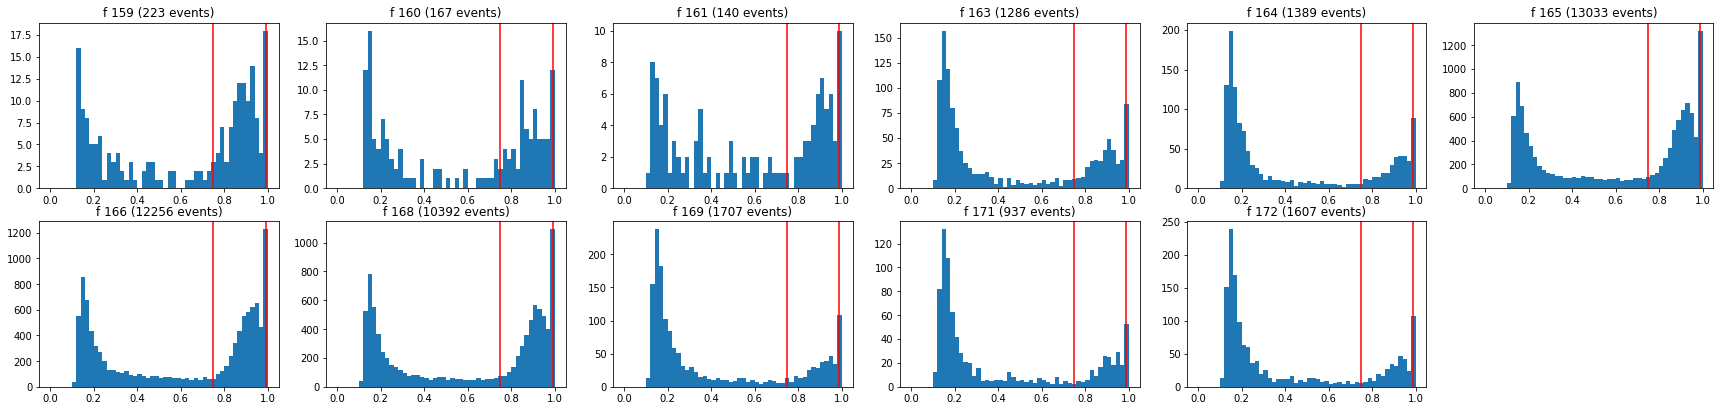

Coincidences - Channel 30
Channel 0


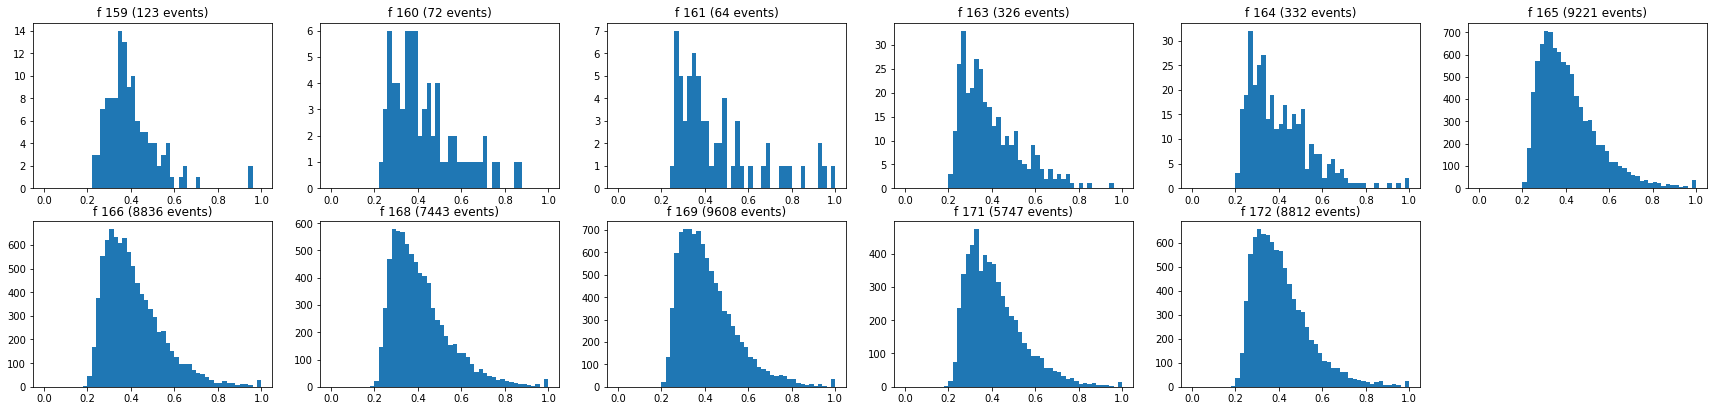

Channel 30


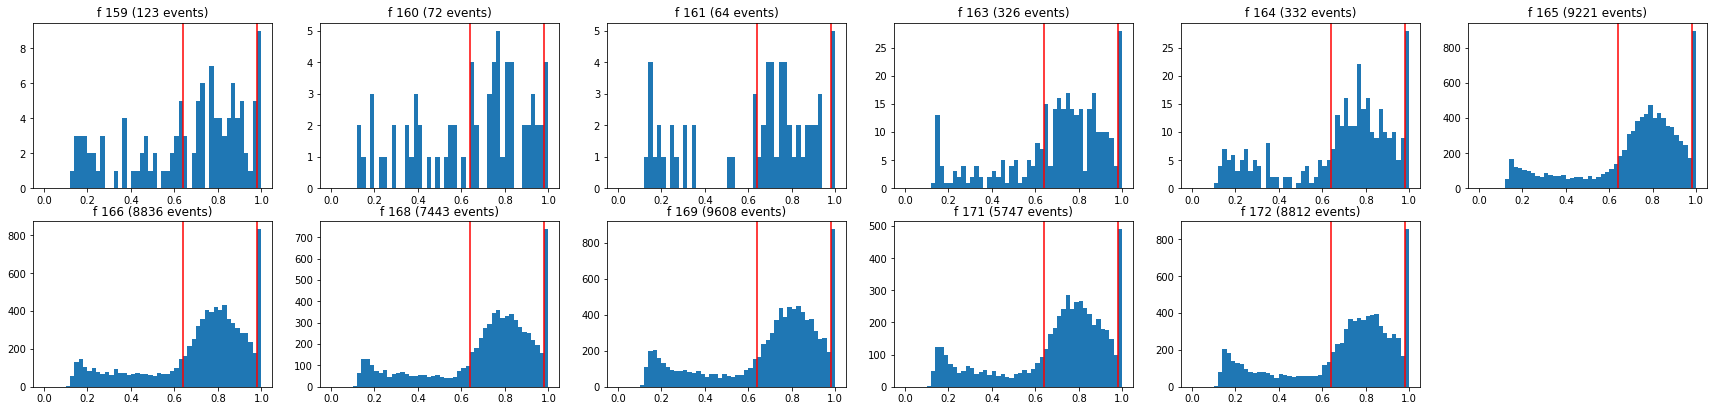

Coincidences - Channel 31
Channel 0


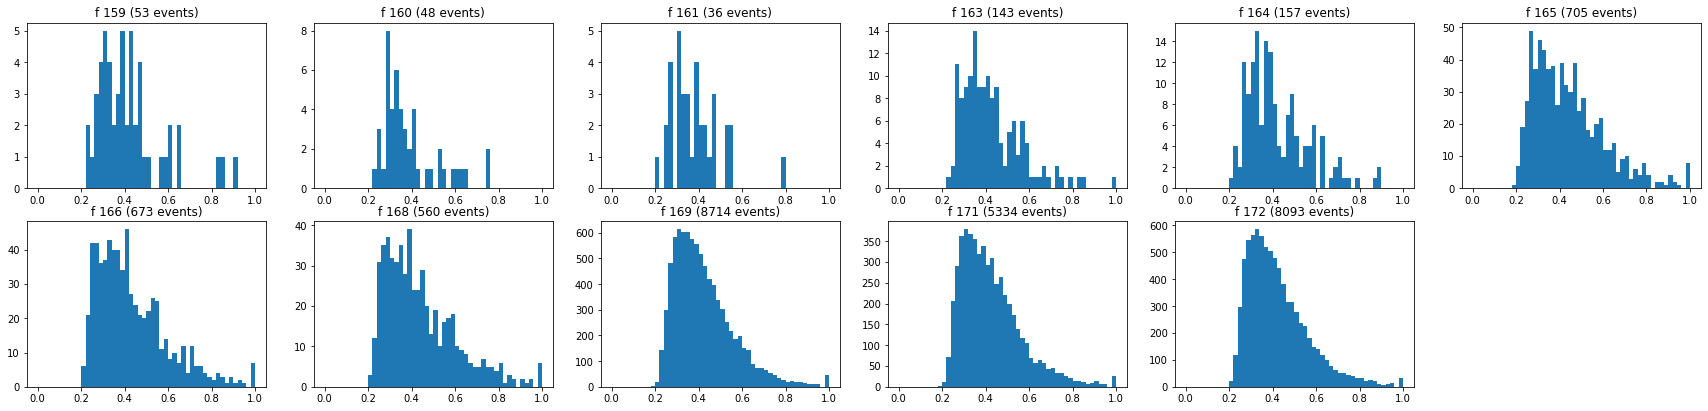

Channel 31


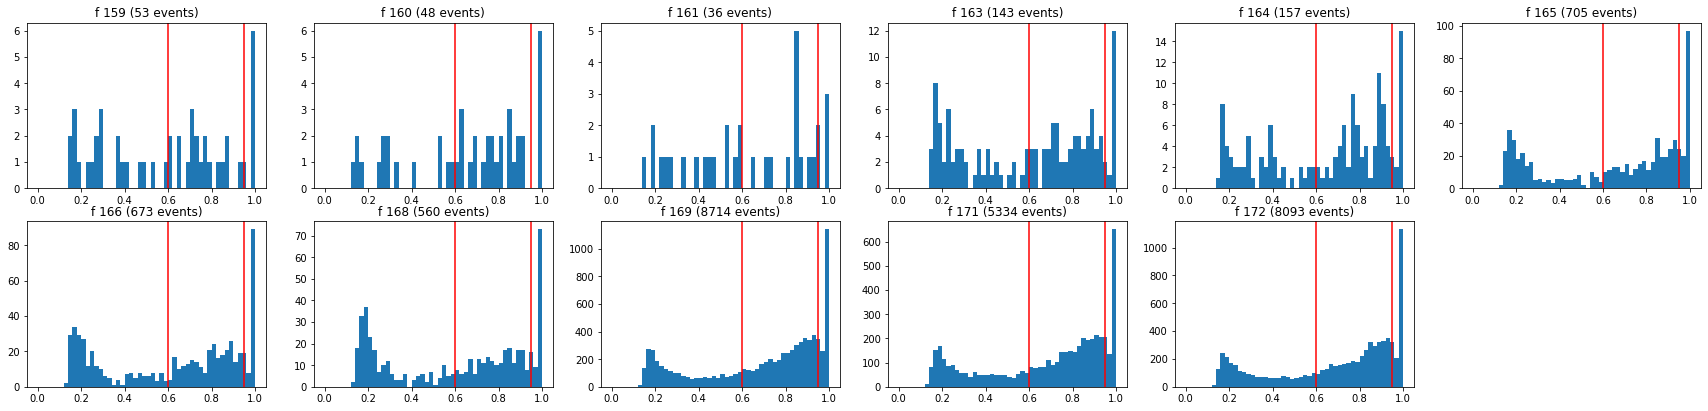

In [11]:
for channel in channels:
    if channel_thresholds[channel] is None:
        continue
        
    print('=========================================================================================')
    print(f'Coincidences - Channel {channel}')
    print('=========================================================================================')
    n_files = len(file_channel_events)
    
    # channel 0
    print('Channel 0')
    plt.figure(figsize=(30, 14))
    for i, channel_events in enumerate(file_channel_events):
        plt.subplot(4, (n_files + 1) // 2, i + 1)
        ampl_data = np.array(channel_events[channel]['sample_ampl'])[:, 0]
        plot_max_channel_hist(ampl_data, n_bins=50, title=f'f {file_names[i][17:20]}', add_count=True, ylim=None, thresholds=None)
       
    plt.show()
    
    # channel non 0
    print(f'Channel {channel}')
    plt.figure(figsize=(30, 14))
    for i, channel_events in enumerate(file_channel_events):
        plt.subplot(4, (n_files + 1) // 2, i + 1)
        ampl_data = np.array(channel_events[channel]['sample_ampl'])[:, 1]
        plot_max_channel_hist(ampl_data, n_bins=50, title=f'f {file_names[i][17:20]}', add_count=True, ylim=None, thresholds=channel_thresholds[channel])
        
    plt.show()
    
    filtered_events = {}
    filtered_events_saturated = {}
    for i, channel_events in enumerate(file_channel_events):
        filtered_file_events, filtered_file_events_saturated = filter_channel_events(channel_events[channel], *channel_thresholds[channel])
        for key, arr in filtered_file_events.items():
            if key not in filtered_events:
                filtered_events[key] = arr
            else:
                filtered_events[key] = np.concatenate([filtered_events[key], arr])
                
        #saturated events for diamond
        for key, arr in filtered_file_events_saturated.items():
            if key not in filtered_events_saturated:
                filtered_events_saturated[key] = arr
            else:
                filtered_events_saturated[key] = np.concatenate([filtered_events_saturated[key], arr])

                
    np.savez_compressed(PWD + f'/data/filtered/channel_{channel}_filtered.npz', filtered_events)
    np.savez_compressed(PWD + f'/data/filtered_saturated/channel_{channel}_filtered.npz', filtered_events_saturated)